In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [159]:
df1 = pd.read_csv(r'zomato.csv',encoding='ISO-8859-1')
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [160]:
df2 = pd.read_excel(r'Country-Code.xlsx')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [161]:
df = pd.merge(df1,df2)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


Exploring Data

In [162]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [164]:
from sklearn.impute import SimpleImputer
Imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Cuisines'] = Imp_mode.fit_transform(df['Cuisines'].values.reshape(-1,1))

In [165]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [166]:
encoding_Le = ["Restaurant Name","City","Address","Locality","Locality Verbose","Cuisines","Currency","Has Table booking",
               "Has Online delivery","Is delivering now","Rating color","Rating text","Country"]

for cols in encoding_Le:
    df[cols]=le.fit_transform(df[cols])

EDA

<AxesSubplot:xlabel='City', ylabel='Average Cost for two'>

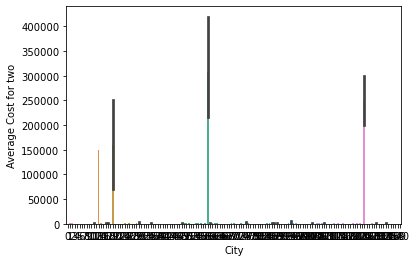

In [167]:
sns.barplot(x=df['City'], y=df['Average Cost for two'])

In [168]:
(df.groupby('City')['Average Cost for two'].sum()).sort_values()

City
80           0
37           7
64           7
57           7
44          10
        ...   
125     500000
89      582650
50      798270
88     3262390
59     4935000
Name: Average Cost for two, Length: 141, dtype: int64

<AxesSubplot:xlabel='Cuisines', ylabel='Average Cost for two'>

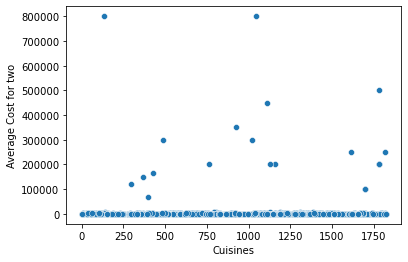

In [169]:
sns.scatterplot(x=df['Cuisines'], y=df['Average Cost for two'])

In [170]:
(df.groupby('Cuisines')['Average Cost for two'].sum()).sort_values()

Cuisines
784          0
443          0
1000         0
375          0
304          7
         ...  
1111    467300
1782    500120
1779    600000
136     800000
1044    810800
Name: Average Cost for two, Length: 1825, dtype: int64

<AxesSubplot:xlabel='Has Table booking', ylabel='Rating text'>

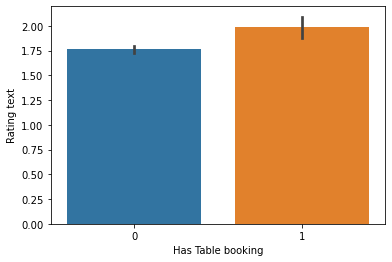

In [171]:
sns.barplot(x=df['Has Table booking'], y=df['Rating text'])

<AxesSubplot:xlabel='Has Online delivery', ylabel='Rating text'>

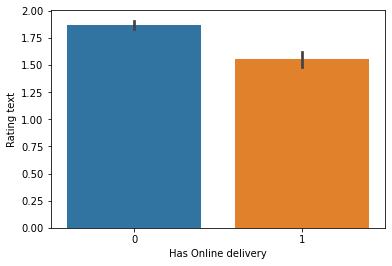

In [172]:
sns.barplot(x=df['Has Online delivery'], y=df['Rating text'])

In [173]:
(df.groupby('Has Online delivery')['Rating text'].sum()).sort_values()

Has Online delivery
1     3812
0    13272
Name: Rating text, dtype: int32

<AxesSubplot:xlabel='Is delivering now', ylabel='Average Cost for two'>

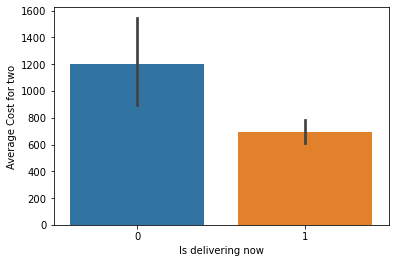

In [174]:
sns.barplot(x=df['Is delivering now'], y=df['Average Cost for two'])

<AxesSubplot:xlabel='Rating color', ylabel='Average Cost for two'>

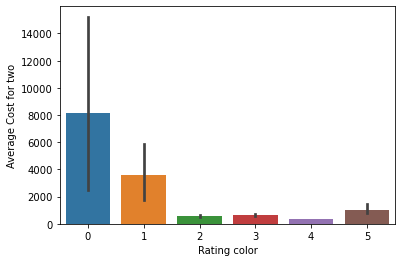

In [175]:
sns.barplot(x=df['Rating color'], y=df['Average Cost for two'])

In [176]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

<AxesSubplot:xlabel='Country Code', ylabel='Average Cost for two'>

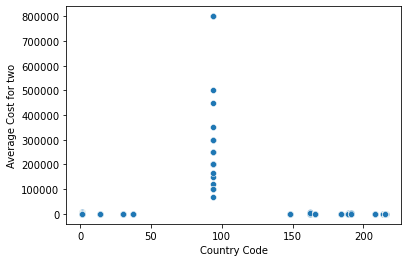

In [177]:
sns.scatterplot(x=df['Country Code'], y=df['Average Cost for two'])

In [178]:
(df.groupby('Country Code')['Average Cost for two'].sum()).sort_values()

Country Code
37         145
14         578
148       2790
208       2885
184       3115
215       3825
166       4475
30        8080
214       9985
216      11350
189      25184
162      35350
191      47500
1      5393400
94     5905000
Name: Average Cost for two, dtype: int64

<AxesSubplot:xlabel='Price range', ylabel='Average Cost for two'>

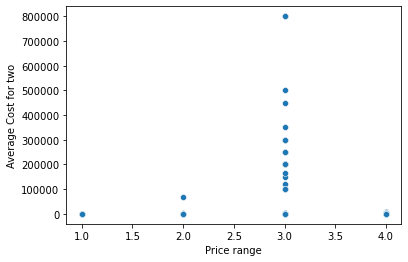

In [179]:
sns.scatterplot(x=df['Price range'], y=df['Average Cost for two'])

In [180]:
(df.groupby('Price range')['Average Cost for two'].sum()).sort_values()

Price range
4    1083235
1    1222913
2    1857920
3    7289594
Name: Average Cost for two, dtype: int64

<AxesSubplot:xlabel='Locality', ylabel='Average Cost for two'>

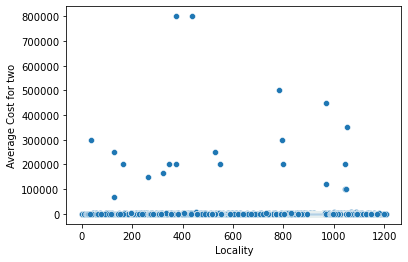

In [181]:
sns.scatterplot(x=df['Locality'], y=df['Average Cost for two'])

In [182]:
(df.groupby('Locality')['Average Cost for two'].sum()).sort_values()

Locality
667           0
761           0
566           7
465           7
282           7
         ...   
1052     350000
781      500000
969      570000
439      800000
375     1000000
Name: Average Cost for two, Length: 1208, dtype: int64

<AxesSubplot:xlabel='Locality Verbose', ylabel='Average Cost for two'>

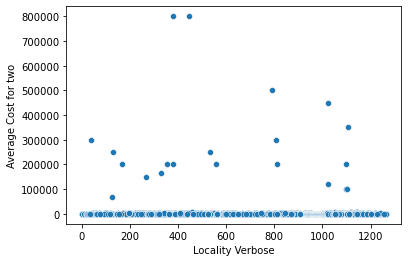

In [183]:
sns.scatterplot(x=df['Locality Verbose'], y=df['Average Cost for two'])

<AxesSubplot:xlabel='Currency', ylabel='Average Cost for two'>

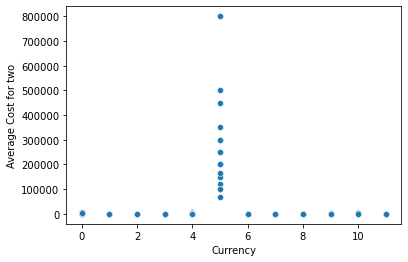

In [184]:
sns.scatterplot(x=df['Currency'], y=df['Average Cost for two'])

In [185]:
(df.groupby('Currency')['Average Cost for two'].sum()).sort_values()

Currency
6        2790
11       2885
7        3825
8        4475
1        8080
3        9985
2       15188
9       25184
0       35350
10      47500
4     5393400
5     5905000
Name: Average Cost for two, dtype: int64

array([[<AxesSubplot:title={'center':'Restaurant ID'}>,
        <AxesSubplot:title={'center':'Restaurant Name'}>,
        <AxesSubplot:title={'center':'Country Code'}>,
        <AxesSubplot:title={'center':'City'}>],
       [<AxesSubplot:title={'center':'Address'}>,
        <AxesSubplot:title={'center':'Locality'}>,
        <AxesSubplot:title={'center':'Locality Verbose'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Cuisines'}>,
        <AxesSubplot:title={'center':'Average Cost for two'}>,
        <AxesSubplot:title={'center':'Currency'}>],
       [<AxesSubplot:title={'center':'Has Table booking'}>,
        <AxesSubplot:title={'center':'Has Online delivery'}>,
        <AxesSubplot:title={'center':'Is delivering now'}>,
        <AxesSubplot:title={'center':'Price range'}>],
       [<AxesSubplot:title={'center':'Aggregate rating'}>,
        <AxesSubplot:title={'center':'Rating color'}>,
  

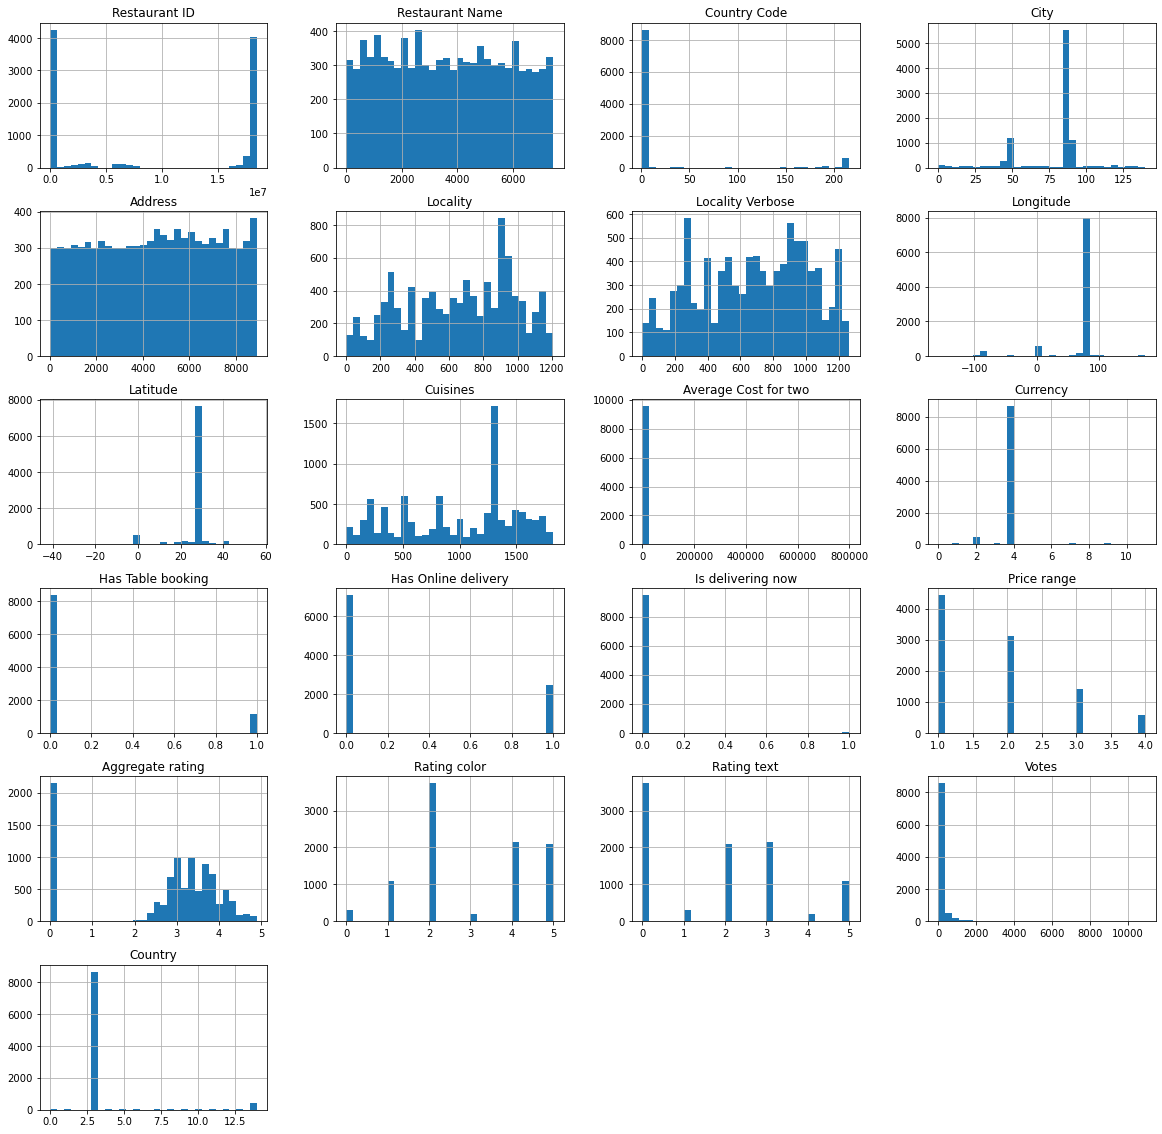

In [186]:
df.hist(figsize=(20,20), grid=True, layout=(6,4), bins=30)

In [187]:
a = df.groupby('City')['Average Cost for two'].sum()
a.sort_values()

City
80           0
37           7
64           7
57           7
44          10
        ...   
125     500000
89      582650
50      798270
88     3262390
59     4935000
Name: Average Cost for two, Length: 141, dtype: int64

In [188]:
(df.groupby('Aggregate rating')['Average Cost for two'].sum()).sort_values()

Aggregate rating
1.9        750
1.8       1000
2.0       6250
2.1       9500
2.2      16175
4.8      18175
4.7      25090
2.3      26600
4.5      51515
2.4      58370
2.5      68450
2.6     114920
2.7     136700
2.8     151260
2.9     171620
3.0     221700
3.1     254525
3.3     293985
3.2     300215
3.8     317134
3.6     328607
3.5     348610
3.4     410470
4.4     429560
3.9     506325
4.0     600225
3.7     693386
0.0     731045
4.3     770945
4.1    1005455
4.2    1030760
4.9    1148840
4.6    1205500
Name: Average Cost for two, dtype: int64

In [189]:
(df.groupby('Country')['Average Cost for two'].sum()).sort_values()

Country
2         145
0         578
5        2790
11       2885
8        3115
13       3825
7        4475
1        8080
12       9985
14      11350
9       25184
6       35350
10      47500
3     5393400
4     5905000
Name: Average Cost for two, dtype: int64

In [190]:
(df.groupby('Cuisines')['Average Cost for two'].sum()).sort_values()

Cuisines
784          0
443          0
1000         0
375          0
304          7
         ...  
1111    467300
1782    500120
1779    600000
136     800000
1044    810800
Name: Average Cost for two, Length: 1825, dtype: int64

Observations:
1) Italian, Continental, Asian, Indonesian, Western, Sunda have copmaratively higher avg cost for two.
2) India and Indonesia has comparatively higher avg cost for two.
3) For higher ratings there is higher avg cost.
4) Restaurant name and Adress we can delete as it doesnt contribute significantly in our data analysis.
5) Price range 3 has higher avg cost.
6) Locality or Locality Verbose we can drop any of thses columns as they provide same information.

In [191]:
df.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,...,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,3653.204586,18.365616,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.461732,...,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,8.791521e+06,2142.917876,56.750546,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.176108,...,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019625e+05,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.000000,...,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,6.004089e+06,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.000000,...,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.835229e+07,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1353.500000,...,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,1.850065e+07,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1824.000000,...,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


In [192]:
df.drop(['Restaurant Name','Locality Verbose','Address'],axis=1,inplace=True)

In [193]:
df.drop(['Switch to order menu'],axis=1,inplace=True)

Checking Correlation

In [194]:
df.corr()['Average Cost for two'].sort_values()

Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Country                -0.004034
Is delivering now      -0.001862
Restaurant ID          -0.001693
Cuisines                0.005831
Has Table booking       0.007758
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64

Country, Is delivering now, Cuisines, Has Table booking these columns have least correlation with Average Cost for two.

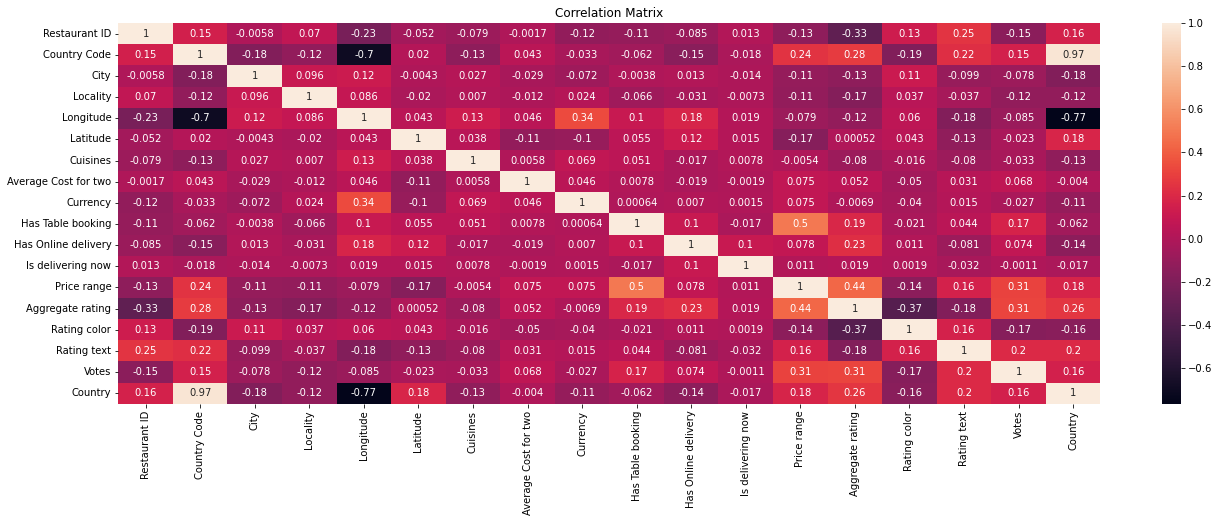

In [195]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Checking skewness

In [196]:
df.skew()

Restaurant ID            0.061570
Country Code             3.043965
City                    -1.193777
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
Country                  3.312721
dtype: float64

In [197]:
columns = ('Country Code','City','Longitude','Latitude','Currency','Has Table booking','Has Online delivery','Is delivering now','Aggregate rating','Votes','Country')
for col in columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [198]:
df['Price range']

0       3
1       3
2       4
3       4
4       4
       ..
9546    3
9547    3
9548    4
9549    4
9550    2
Name: Price range, Length: 9551, dtype: int64

Checking outliers

Restaurant ID              AxesSubplot(0.125,0.816017;0.227941x0.0639831)
Country Code            AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
City                    AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
Locality                   AxesSubplot(0.125,0.739237;0.227941x0.0639831)
Longitude               AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
Latitude                AxesSubplot(0.672059,0.739237;0.227941x0.0639831)
Cuisines                   AxesSubplot(0.125,0.662458;0.227941x0.0639831)
Average Cost for two    AxesSubplot(0.398529,0.662458;0.227941x0.0639831)
Currency                AxesSubplot(0.672059,0.662458;0.227941x0.0639831)
Has Table booking          AxesSubplot(0.125,0.585678;0.227941x0.0639831)
Has Online delivery     AxesSubplot(0.398529,0.585678;0.227941x0.0639831)
Is delivering now       AxesSubplot(0.672059,0.585678;0.227941x0.0639831)
Price range                AxesSubplot(0.125,0.508898;0.227941x0.0639831)
Aggregate rating        AxesSubplot(0.

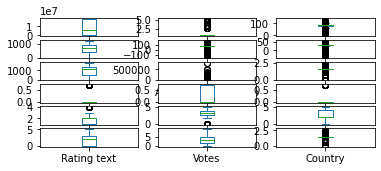

In [199]:
df.plot(kind='box',subplots=True,layout=(10,3))

In [200]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    0,    1, ..., 9549, 9550, 9550], dtype=int64),
 array([1, 8, 1, ..., 8, 1, 8], dtype=int64))

In [201]:
df = df[(z<3).all(axis=1)]
df

,Restaurant ID,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
706,2500023,0.693147,11,19,75.346017,19.876219,1338,800,1.609438,0.0,0.0,0.0,3,3.6,5,2,5.484797,1.386294
707,2500076,0.693147,11,187,0.000000,0.000000,1049,850,1.609438,0.0,0.0,0.0,3,3.3,2,0,4.189655,1.386294
708,2500054,0.693147,11,150,75.353942,19.874733,1329,600,1.609438,0.0,0.0,0.0,2,3.3,2,0,4.158883,1.386294
709,2500134,0.693147,11,150,75.340775,19.876106,1618,700,1.609438,0.0,0.0,0.0,2,3.1,2,0,2.995732,1.386294
710,2500069,0.693147,11,150,75.367127,19.875522,1554,350,1.609438,0.0,0.0,0.0,2,3.4,2,0,3.850148,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,2800418,0.693147,134,994,0.000000,0.000000,465,400,1.609438,0.0,0.0,0.0,2,3.7,5,2,4.454347,1.386294
9273,2800881,0.693147,134,994,83.315281,17.719539,322,600,1.609438,0.0,0.0,0.0,2,4.3,1,5,5.153292,1.386294
9274,2800042,0.693147,134,1081,83.336840,17.721182,88,1500,1.609438,0.0,0.0,0.0,4,3.8,5,2,4.317488,1.386294
9275,2800019,0.693147,134,1169,83.314942,17.721119,1031,1400,1.609438,0.0,0.0,0.0,3,4.4,1,5,5.758902,1.386294


In [202]:
df.shape

(8537, 18)

Percentage data loss

In [203]:
Data_loss=((9551-8537)/9551)*100
Data_loss

10.616689351900325

Task1 - Model for Predicting Average Cost for two

In [204]:
x = df.drop(['Average Cost for two'],axis=1)
y = df['Average Cost for two']

In [205]:
from sklearn.preprocessing import MinMaxScaler

In [206]:
scaler = MinMaxScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)
print(scaled_features)

[[0.13512914 0.         0.016      ... 0.4        0.58978062 0.        ]
 [0.135132   0.         0.016      ... 0.         0.45051388 0.        ]
 [0.13513081 0.         0.016      ... 0.         0.447205   0.        ]
 ...
 [0.15134586 0.         1.         ... 0.4        0.46425982 0.        ]
 [0.15134461 0.         1.         ... 1.         0.61925513 0.        ]
 [0.99730733 1.         0.         ... 1.         0.37267084 1.        ]]


In [207]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),RandomForestRegressor(),ExtraTreesRegressor()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        R2Score = r2_score(y_test,prediction)
        print("R2 score for random state: ", i, " is ",R2Score)
print()
print()
print()
print()

R2 score for random state:  0  is  0.7696368788247271
R2 score for random state:  0  is  -0.017566797994063466
R2 score for random state:  0  is  0.7575978093001137
R2 score for random state:  0  is  0.8873320866461111
R2 score for random state:  0  is  0.879034311119224
R2 score for random state:  1  is  0.7508306510842565
R2 score for random state:  1  is  0.10180271487696113
R2 score for random state:  1  is  0.7304232708723573
R2 score for random state:  1  is  0.8753790685059397
R2 score for random state:  1  is  0.8808605479723132
R2 score for random state:  2  is  0.7619111788960877
R2 score for random state:  2  is  0.07336064336025394
R2 score for random state:  2  is  0.718501559122396
R2 score for random state:  2  is  0.8560291131287447
R2 score for random state:  2  is  0.8655128406026089
R2 score for random state:  3  is  0.7670299081619695
R2 score for random state:  3  is  0.07514367710495529
R2 score for random state:  3  is  0.7352553303950409
R2 score for random stat

In [208]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,prediction))
print("Mean Squared Error: ",mean_squared_error(y_test,prediction))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,prediction)))

Mean Absolute Error:  111.9249467707594
Mean Squared Error:  45788.07847764372
Root Mean Squared Error:  213.98149096976525


Task2 - Predicting Price Range

In [209]:
x1 = df.drop(['Price range'],axis=1)
y1 = df['Price range']

In [210]:
scaler = MinMaxScaler()
scaler.fit(x1)
scaled_features = scaler.transform(x1)
print(scaled_features)

[[0.13512914 0.         0.016      ... 0.4        0.58978062 0.        ]
 [0.135132   0.         0.016      ... 0.         0.45051388 0.        ]
 [0.13513081 0.         0.016      ... 0.         0.447205   0.        ]
 ...
 [0.15134586 0.         1.         ... 0.4        0.46425982 0.        ]
 [0.15134461 0.         1.         ... 1.         0.61925513 0.        ]
 [0.99730733 1.         0.         ... 1.         0.37267084 1.        ]]


In [211]:
df['Price range']

706     3
707     3
708     2
709     2
710     2
       ..
9272    2
9273    2
9274    4
9275    3
9312    3
Name: Price range, Length: 8537, dtype: int64

In [212]:
model = [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]

for i in range(0,50):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x1_train,y1_train)
        prediction = models.predict(x1_test)
        accu_Score = accuracy_score(y1_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.9879347054648687
Accuracy score for random state:  0  is  0.5145493257629524
Accuracy score for random state:  0  is  0.9840312278211497
Accuracy score for random state:  0  is  0.7157558552164656
Accuracy score for random state:  1  is  0.9914833215046132
Accuracy score for random state:  1  is  0.5024840312278211
Accuracy score for random state:  1  is  0.988999290276792
Accuracy score for random state:  1  is  0.7274662881476224
Accuracy score for random state:  2  is  0.9882895670688432
Accuracy score for random state:  2  is  0.5230660042583393
Accuracy score for random state:  2  is  0.9850958126330731
Accuracy score for random state:  2  is  0.709013484740951
Accuracy score for random state:  3  is  0.9879347054648687
Accuracy score for random state:  3  is  0.5188076650106459
Accuracy score for random state:  3  is  0.9879347054648687
Accuracy score for random state:  3  is  0.7139815471965933
Accuracy score for random state:  4  is  0

Highest accuracy Score:0.9914833215046132 is at random state 48 and for model: RandomForestClassifier.

In [218]:
score = cross_val_score(Rfc,x1,y1,cv=5)

In [219]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.95491803 0.96487119 0.99941418 0.99941418 0.96426479]
Mean Score:  0.9765764746072447
std Score:  0.01897788454403541
